In [1]:
from pathlib import Path

from ml.pipeline import FeitDataPipeline

from tensorflow.keras.applications import ResNet50

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import schedules

from tensorflow.keras.callbacks import ReduceLROnPlateau

from tensorflow import keras

from livelossplot import PlotLossesKerasTF

import os
print(os.getcwd())
os.chdir('/home/jelinek/recetox/')


model_name = 'ResNet50_ImagenetWeightsTrainAll'

/home/jelinek/recetox/histoseg/notebooks/ResNets


In [2]:
class MyResNet50(FeitDataPipeline):

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.model = self.get_compiled_model()
        self.params. name = model_name
        self.params.batch_size = 32
        self.params.number_of_classes = 11

        lr_schedule = schedules.ExponentialDecay(
                        initial_learning_rate=1e-3,
                        decay_steps=150,
                        decay_rate=0.1,
                        staircase=True)

        self.optimizer = ( Adam(
            learning_rate=lr_schedule,
            beta_1=0.99,
            beta_2=0.9999))


    @staticmethod
    def get_compiled_model():
        model = ResNet50(include_top=True,
                      input_shape=(256, 256, 3),
                      weights=None,
                      classes=11
                      )


        return model


    def _train_model(self, data_train, data_valid):

        self.model.fit(data_train,
                       steps_per_epoch=250,
                       epochs=200,
                       shuffle=True,
                       validation_data=data_valid,
                       validation_freq=10,
                       verbose=1,
                       callbacks=[self.tensorboard, PlotLossesKerasTF()])

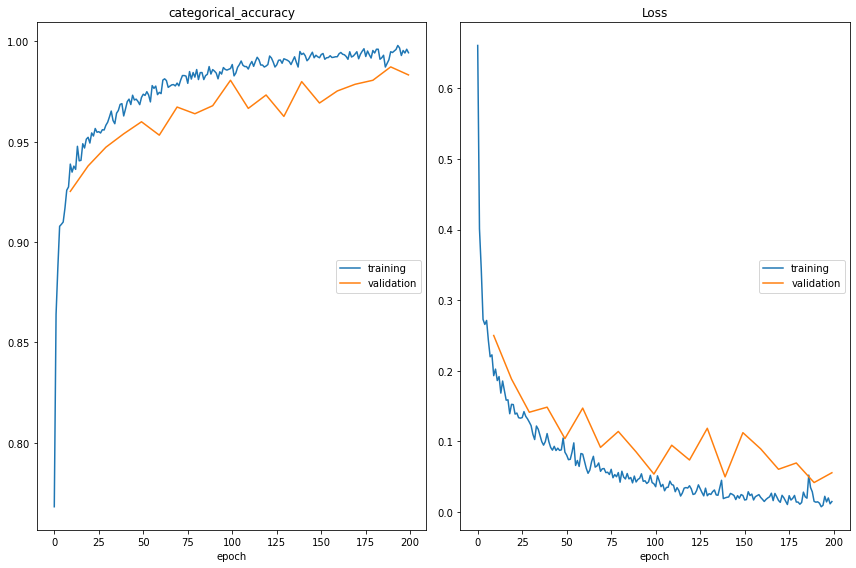

categorical_accuracy
	training         	 (min:    0.768, max:    0.998, cur:    0.994)
	validation       	 (min:    0.925, max:    0.987, cur:    0.983)
Loss
	training         	 (min:    0.007, max:    0.661, cur:    0.015)
	validation       	 (min:    0.042, max:    0.250, cur:    0.055)
10/10 [==============================] - 1s 112ms/step - loss: 0.0622 - categorical_accuracy: 0.9750
Measuring time
--Iteration 10/10
Batch size: 32
Mean time per tile 0.9316ms
Confusion Matrix
[[327   1   0   0   0   0   3   0   0   0   4]
 [  3  55   4   0   1   0   1   0   0   0   0]
 [  0   0 144   0   1   0   0   0   0   0   0]
 [  0   0   0  11   0   0   0   0   0   0   0]
 [  1   0   0   2 541   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0   0]
 [  0   0   1   0   0   0  75   1   0   0   0]
 [  0   0   0   0   0   0   0  86   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0]
 [  2   0   0   0   0   0   0   0   0   0 232]

In [14]:
pipeline = MyResNet50(train_data_dir='data/Feit_colon-annotation-tiles-256/data_train/',
                      valid_data_dir='data/Feit_colon-annotation-tiles-256/data_valid/')

pipeline.execute_pipeline(perform_validation=True, perform_test_segmentation=False)

In [15]:
pipeline.save_pipeline()

/home/jelinek/anaconda3/envs/recetox/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [3]:
pipeline = MyResNet50.load_pipeline(model_name)

2022-05-15 22:37:37.159329: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-15 22:37:37.204286: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-15 22:37:37.204503: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-15 22:37:37.205259: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

In [8]:
from ml.eval import evaluate_segmentation_on_feit_annotation

evaluation_path = Path('data/Feit_colon-annotation_valid/')

segmentation_dir = Path('segmentations') / pipeline.params.name

evaluate_segmentation_on_feit_annotation(evaluation_path, pipeline.build_segmenter(),
                                         32, pipeline.params.class_names,
                                         save_segmentations=True, segmentations_dir=segmentation_dir,
                                         neighbourhood_size=1, include_unknown=False)

Processing region 120 out of 120
Post-processing image...
Processing grid point 663499 out of 663499
Processing image took 2744.640411376953 seconds
Saving file...
File saved to segmentations/ResNet50_ImagenetWeightsTrainAll/ns-adenoca-colon-15071-2019-20x-he-4.tiff
----------------------------------------------------
Processing region 255 out of 255
Post-processing image...
Processing grid point 1599360 out of 1599360
Processing image took 6646.273116827011 seconds
Saving file...
File saved to segmentations/ResNet50_ImagenetWeightsTrainAll/ns-adenoca-colon-15072-2019-20x-he-a2.tiff
----------------------------------------------------
Processing region 255 out of 255
Post-processing image...
Processing grid point 1544036 out of 1544036
Processing image took 6463.949270963669 seconds
Saving file...
File saved to segmentations/ResNet50_ImagenetWeightsTrainAll/ns-adenoca-colon-3043-2019-20x-he-a1.tiff
----------------------------------------------------
Processing region 567 out of 567
Po

In [4]:
from ml.eval import evaluate_segmentation_on_feit_annotation

evaluation_path = Path('data/Feit_colon-annotation_valid/')

segmentation_dir = Path('segmentations') / pipeline.params.name

evaluate_segmentation_on_feit_annotation(evaluation_path, pipeline.build_segmenter(),
                                         128, pipeline.params.class_names,
                                         save_segmentations=False, segmentations_dir=segmentation_dir,
                                         neighbourhood_size=1, include_unknown=False)

Processing region 1 out of 120

2022-05-15 22:37:42.387697: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201
2022-05-15 22:37:42.884848: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


Processing region 120 out of 120
Post-processing image...
Processing grid point 41664 out of 41664
Processing image took 207.69656038284302 seconds
Processing region 255 out of 255
Post-processing image...
Processing grid point 99960 out of 99960
Processing image took 473.3417332172394 seconds
Processing region 255 out of 255
Post-processing image...
Processing grid point 96577 out of 96577
Processing image took 461.4230670928955 seconds
Processing region 567 out of 567
Post-processing image...
Processing grid point 220296 out of 220296
Processing image took 997.4200127124786 seconds
Aggregated evaluation: 
[[18751   597   413   130    36     0    24    16     0     0 13075]
 [   40  3175   389    46   835     2   136    27     0     0   156]
 [  153   775  1290    55    84     0   138   235     0     0   538]
 [   31     4     0    16     0     0     0     0     0     0   749]
 [   29   643   210  2170 12714     0   115    11     0     0    39]
 [   10     0    14   165     1    40   